In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast


df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")


#Data_Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Utilisateur\anaconda3\envs\python_again_vs_code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# After successfully loading the data once
df.to_csv("data_jobs.csv", index=False)

#Then next time you can simply do
#df = pd.read_csv("data_jobs.csv")


In [9]:
#
import seaborn as sns

Exploratory Data Analysis

In [4]:
#Getting a dataframe with only Data Analysts jobs in the US
#This time around I will try rewriting the code by myself

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()



In [5]:
df_DA_US 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,NaN,NaN,NaN,Assuredpartners,NaN,NaN
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,NaN,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,NaN,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,NaN,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,NaN,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,NaN,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,NaN,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


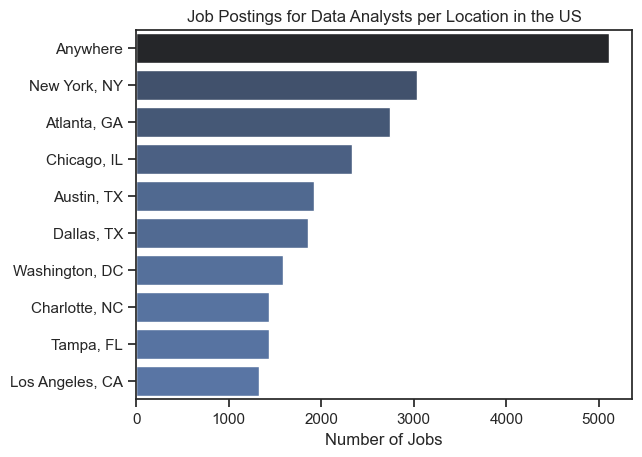

In [13]:
#
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.title('Job Postings for Data Analysts per Location in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

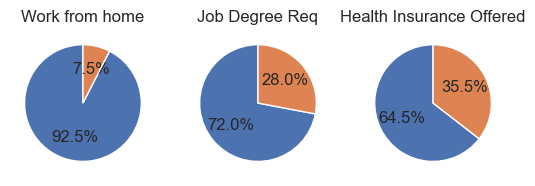

In [15]:
#pie plotting of columns with boolean values

fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home' : 'Work from home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'

}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct= '%1.1f%%')
    ax[i].set_title(title)

plt.show()    

In [ ]:
#rewriting the previous code
#Still wrapping my mind around those

fig, ax = plt.subplots(1, 3)

dic_column = {
'job_work_from_home' : 'work from home',
'job_no_degree_mention' : 'Job degree requirement',
'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()) #Go through each item in my dictionary, 
#one by one, and return the contents, column and title. Also,add a counter (0, 1, 2, …) 
# to each line or pair of item in the dictionnary thanks to enumerate
#The numbers are to be assigned to i which will be used as substitute in the simplified code

ax[i].pie[df_DA_US[column].value_counts()], startangle= 90, autopct='%1.1f%%'
ax[i].set_title(title)


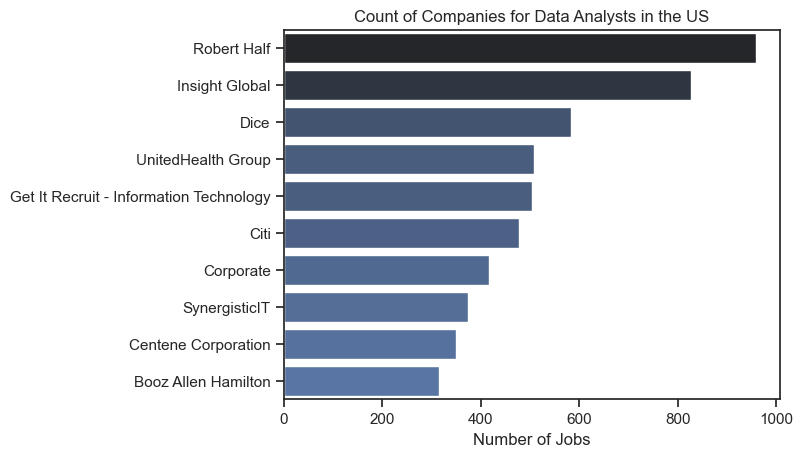

In [ ]:
#exploring data analysts jobs per company
#To change the same value in the code at the same time, use shortcut Ctrl+shift+l

df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
df_plot

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Count of Companies for Data Analysts in the US')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()